<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
- the layer that takes the input neurons/ brings the data into the system
### Hidden Layer:
- the "black box" of the NN, in between the input and output layers, doesn't look outside
### Output Layer:
- the final layer that outputs the numbers/makes inferences
### Neuron:
- a perceptron that takes a weighted sum of inputs, adds bias, as passes through an activation function to determine whether it passes info to the next stage; where output = activation_function(WX + b)
### Weight:
- a matrix that transforms neuron inputs into another shape
### Activation Function:
- transforms a matrix into a desirable shape for output. (sigmoid, tanh, step, relu)
### Node Map:
- a graph of the neural network - where different nodes represent different operations
### Perceptron:
- a single layer of a neuron


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

`inputs --> weights(x) --> bias(+) --> (activation function) --> output`

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)


data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')
df

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [48]:
# Define sigmoid & derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1-sx)

In [93]:
inputs = np.array([
    [0,0],
    [1,0],
    [0,1],
    [1,1]
])

correct_outputs = [[1], [1], [1], [0]]

for iteration in range(1000):
    
    weights = 2 * np.random.random((2,1)) - 1
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(inputs, weights)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Cac error
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(activated_output)
    
    # Update the Weights
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[ 0.64368429]
 [-0.7410635 ]]
Output after training
[[0.5       ]
 [0.66363649]
 [0.31044607]
 [0.47041145]]


In [100]:
# Create Perceptron class that takes 2 inputs and spits out 1 output to solve all this stuff for us
class Perceptron():
    def __init__(self, inputs=2, output=1, rate=0.01, n_iter=10000):
        self.input = inputs
        self.output = output
        self.rate = rate
        self.n_iter = n_iter
        
        # Initialize random weights
        self.weight = np.random.randn(inputs, output)
        
        # Initialize bias
        self.bias = np.zeros(output)
        
        # Initialize loss function (empty list for empty perceptron)
        self.loss = []
        pass
    
    # Define sigmoid function
    def sigmoid(self, x):
        """
        Sigmoid function
        """
        return 1 / (1 + np.exp(-x))
    
    # Sigmoid derivative function
    def sigmoid_derivative(self, x):
        """
        Sigmoid derivative
        """
        sx = self.sigmoid(x)
        return sx * (1-sx)
    
    # Define neural network affine function
    def affine_func(self, x, w, b):
        '''
        y = Wx + b
        '''
        scores = x.dot(w) + b
        cache = (x, w, b)
        return scores, cache
    
    # Define back-propagation
    def back_prop(self, d_out, cache):
        '''
        dY
        '''
        x, w, b = cache
        dx = d_out.dot(w.T)
        dw = x.reshape(-1, 1).dot(d_out.reshape(-1, 1))
        db = np.sum(d_out, axis=0)
        
        return dx, dw, db
    
    def fit(self, x, y):
        '''
        Fit the perceptron
        '''
        for i in range(self.n_iter):            
            for j in range(x.shape[0]):
                # forward prop
                scores, cache = self.affine_func(x[j], self.weight, self.bias)
                
                # scoring
                out = self.sigmoid(scores)
                loss = y[j] - out.reshape(-1,)
                self.loss.append(loss)
                
                # back prop
                dout = loss * self.sigmoid_derivative(out)
                _, dw, db = self.back_prop(dout.reshape(-1,), cache)
        
                # gradient update
                self.weight += dw
                self.bias += db
        pass
        
    def predict(self, x):
        '''
        Make predictions
        '''
        return self.sigmoid(self.affine_func(x, self.weight, self.bias)[0])

In [101]:
X = df[['x1', 'x2']].to_numpy()
y = df['y'].to_numpy()

nand = Perceptron(inputs=2, output=1)
nand.fit(X,y)

In [102]:
nand.weight, nand.bias

(array([[-11.84503314],
        [-11.84565959]]), array([17.81572187]))

In [105]:
test1 = np.array([0, 0])
test2 = np.array([0, 1])
test3 = np.array([1, 0])
test4 = np.array([1, 1])
print("{}".format(test1), nand.predict(test1))
print("{}".format(test2), nand.predict(test2))
print("{}".format(test3), nand.predict(test3))
print("{}".format(test4), nand.predict(test4))

[0 0] [0.99999998]
[0 1] [0.99745242]
[1 0] [0.99745402]
[1 1] [0.00280101]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [129]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [130]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]
X = diabetes[feats]
y = diabetes['Outcome']
transformer = Normalizer().fit(X)

X = transformer.transform(X)
X

array([[0.03355237, 0.82762513, 0.40262844, ..., 0.18789327, 0.00350622,
        0.27960308],
       [0.008424  , 0.71604034, 0.55598426, ..., 0.22407851, 0.00295683,
        0.26114412],
       [0.04039768, 0.92409698, 0.32318146, ..., 0.11765825, 0.00339341,
        0.16159073],
       ...,
       [0.02691539, 0.65135243, 0.38758161, ..., 0.14103664, 0.00131885,
        0.16149234],
       [0.00665306, 0.83828547, 0.39918356, ..., 0.20025708, 0.00232192,
        0.31269379],
       [0.00791454, 0.73605211, 0.55401772, ..., 0.24060198, 0.00249308,
        0.18203439]])

In [131]:
nn = Perceptron(inputs=8, output=1, n_iter=1000)
nn.fit(X, y)

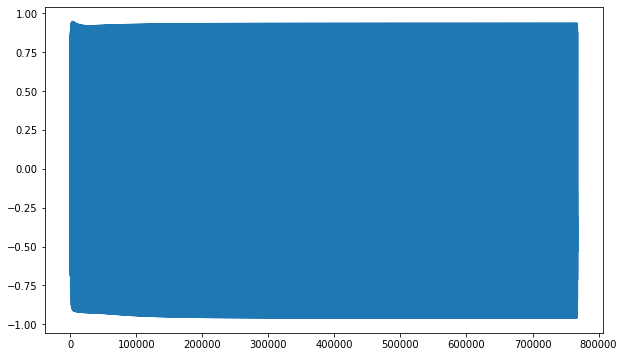

In [132]:
plt.figure(figsize=(10,6))
plt.plot(nn.loss);

In [133]:
y = y.to_numpy()
y.shape

(768,)

In [139]:
np.sqrt(np.mean((nn.predict(X) - y) ** 2))

0.5018994123772049

In [140]:
# Compare against linear regression accuracy
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X, y)

In [143]:
lr.score(X, y)

0.08841098782251833

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?